In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
# plt.rcParams['figure.figsize'] = [10, 6]

# 특성 공학

- 특성공학(Feature Engineering) 이란?
    - 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업 
    - 농어의 길이, 농어의 높이 => 농어의 길이 * 농어의 높이 

## 데이터 준비

In [3]:
#length, height, width
df = pd.read_csv('https://bit.ly/perch_csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [4]:
#데이터프레임 -> 2차원 넘파이 배열
perch_full = df.to_numpy()
print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [5]:
#농어의 무게 y
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [6]:
#기존 데이터프레임에 y weight 컬럼 추가
df['weight'] = perch_weight
df.head()

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [7]:
#학습, 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state=42)

# 선형회귀 적용

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


#모델 생성 및 학습 
model_lr = LinearRegression()
model_lr.fit(X_train ,y_train )

mse = mean_squared_error(y_test, model_lr.predict(X_test))
rmse = np.sqrt(mse) 

print(model_lr.score(X_train, y_train))
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y_test, model_lr.predict(X_test))))

0.9559326821885706
MSE : 12080.653 , RMSE : 109.912
r2_score : 0.880


In [9]:
print('절편 값:', model_lr.intercept_)
print('회귀 계수값 기울기:', model_lr.coef_)

절편 값: -599.1708082981099
회귀 계수값 기울기: [ 9.07538153 69.46401443 38.00385678]


In [10]:
df.columns

Index(['length', ' height', ' width', 'weight'], dtype='object')

0
1
2


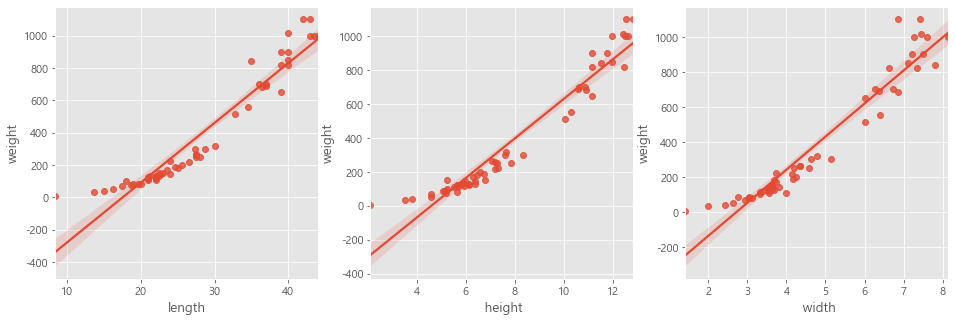

In [11]:
# 1개의 행과 3개의 열을 가진 subplots를 이용. axs는 1x3개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,5) , ncols=3 , nrows=1)
lm_features = list(df.columns)

# sns.regplot(x='length' , y='weight', data=df , ax=axs[0])
# sns.regplot(x=' height' , y='weight', data=df , ax=axs[1])
# sns.regplot(x=' width' , y='weight', data=df , ax=axs[2])

for i , feature in enumerate(lm_features[:3]):
    print(i)
    sns.regplot(x=feature , y='weight', data=df , ax=axs[i])

# PolynomialFeatures 활용 

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [14]:
#include_bias = False -> 첫번째로 생성되는 절편 제외
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [15]:
#학습용, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state=42)

#객체 생성
#degree 기본값 2
poly = PolynomialFeatures(include_bias=False)

#학습용 데이터 X에 PolynomialFeatures 적용
poly.fit(X_train)

#별도 변수로 저장
X_train_poly = poly.transform(X_train)

In [16]:
print(X_train.shape, X_train_poly.shape)

(42, 3) (42, 9)


In [17]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [18]:
#테스트용 데이터 X에 PolynomialFeatures 적용
X_test_poly = poly.transform(X_test)

In [19]:
X_test_poly.shape

(14, 9)

In [20]:
#선형 모델 생성 후 학습
model_lr = LinearRegression()
model_lr.fit(X_train_poly, y_train)

print(model_lr.score(X_train_poly, y_train))
print(model_lr.score(X_test_poly, y_test))

0.9903183436982125
0.9714559911594155


In [21]:
# degree=5
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(X_train)
X_train_poly2 = poly.transform(X_train)
X_test_poly2 = poly.transform(X_test)

In [22]:
print(poly.get_feature_names())

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2', 'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1', 'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3', 'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2', 'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2', 'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3', 'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4', 'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5', 'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5']


In [23]:
X_train_poly2[:2]

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, 3.84160000e+02,
        1.00744000e+02, 5.95840000e+01, 2.64196000e+01, 1.56256000e+01,
        9.24160000e+00, 7.52953600e+03, 1.97458240e+03, 1.16784640e+03,
        5.17824160e+02, 3.06261760e+02, 1.81135360e+02, 1.35796744e+02,
        8.03155840e+01, 4.75018240e+01, 2.80944640e+01, 1.47578906e+05,
        3.87018150e+04, 2.28897894e+04, 1.01493535e+04, 6.00273050e+03,
        3.55025306e+03, 2.66161618e+03, 1.57418545e+03, 9.31035750e+02,
        5.50651494e+02, 6.97995264e+02, 4.12822102e+02, 2.44159375e+02,
        1.44405545e+02, 8.54071706e+01, 2.89254655e+06, 7.58555575e+05,
        4.48639873e+05, 1.98927329e+05, 1.17653518e+05, 6.95849599e+04,
        5.21676772e+04, 3.08540347e+04, 1.82483007e+04, 1.07927693e+04,
        1.36807072e+04, 8.09131319e+03, 4.78552376e+03, 2.83034868e+03,
        1.67398054e+03, 3.58769566e+03, 2.12190560e+03, 1.25497919e+03,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       

In [24]:
print(X_train_poly2.shape)

(42, 55)


In [25]:
model_lr = LinearRegression()
model_lr.fit(X_train_poly2, y_train)
print(model_lr.score(X_train_poly2, y_train))
print(model_lr.score(X_test_poly2, y_test))

0.9999999999938143
-144.40744532797535


# 퀴즈 

- 1) 보스턴 주택 가격데이타를 스케일링한 후 선형회귀 모델을 정의하고 테스트하여라(ML4_01)
- 2) 보스턴 주택 가격데이타를  PolynomialFeatures 를 이용해서 데이타를 변형하고 
   선형회귀 모델을 정의하고 테스트하여라 
- 1)의 모델과 비교 

===========================================================================

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [26]:
from sklearn.datasets import load_boston

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
boston_df = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
boston_df['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',boston_df.shape)
boston_df.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

In [28]:
# 모델 생성및 학습 
model_lr = LinearRegression()
model_lr.fit(X_train ,y_train )
y_preds = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) 

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
r2_score : 0.757


In [29]:
print('절편 값:', model_lr.intercept_)
print('회귀 계수값:', model_lr.coef_)

절편 값: 40.995595172164336
회귀 계수값: [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]


In [30]:
# 각피처의 기울기 
model_lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [31]:
# 절편
model_lr.intercept_

40.995595172164336

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

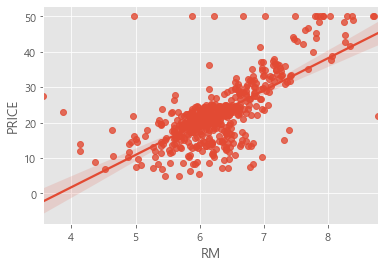

In [32]:
sns.regplot(x='RM' , y='PRICE', data=boston_df)

### Polynominal Feature 활용

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
# 학습용과 테스트용으로 분리
X_train , X_test , y_train , y_test = train_test_split( X_data , y_target , \
                                                       test_size=0.3, random_state=156)

# 객체 생성 
poly = PolynomialFeatures(include_bias=False, degree=3)
# poly = PolynomialFeatures(include_bias=False)

# 학습용데이타 X 에 PolynomialFeatures 적용 
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 13), (354,), (152, 13), (152,))

In [36]:
print(poly.get_feature_names())

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0^2 x6',

In [37]:
# 선형 모델 생성 후 학습 
model_lr = LinearRegression()
model_lr.fit(X_train_poly, y_train)

print(model_lr.score(X_train_poly, y_train))
print(model_lr.score(X_test_poly, y_test))

1.0
-1116.5979172270693


In [38]:
mse = mean_squared_error(y_test, model_lr.predict(X_test_poly))
rmse = np.sqrt(mse) 

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y_test,  model_lr.predict(X_test_poly))))

MSE : 79625.593 , RMSE : 282.180
r2_score : -1116.598


#polynomial 적용 전
MSE : 17.297 , RMSE : 4.159
r2_score : 0.757